## Задача 3.3 
Выборка: [Wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

Предложить метод выбора наиболее важных признаков для логистической регрессии на основе изученных методов прикладной статистики.
Осуществить выбор.

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

from sklearn.preprocessing import StandardScaler

from itertools import combinations

sns.set()

from sklearn.datasets import load_wine

In [37]:
data = load_wine()
X, y, f_names = data.data, data.target, data.feature_names
# обрабатываем чтобы имена не содержали "/")
f_names = [f if '/' not in f else f.split('/')[-1] for f in f_names]
print('f_names', f_names)

# нормировка признаков для численной устойчивости
scaler = StandardScaler()
X = scaler.fit_transform(X)

print('Число классов:', np.unique(y).shape[0])

f_names ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od315_of_diluted_wines', 'proline']
Число классов: 3


Сформируем датасет и рассмотрим


In [38]:
Data = pd.DataFrame.from_dict({f: X[:, i] for i, f in enumerate(f_names)})
Data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od315_of_diluted_wines,proline
45,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653
11,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
150,0.616869,0.703455,0.926567,1.352801,1.633052,-1.434267,-0.461091,-1.143031,-0.597284,1.532124,-1.612125,-1.852681,-0.786230
143,0.765101,2.346179,-0.060375,0.151661,-0.543562,-0.472868,-1.234146,0.871420,-1.000263,-0.284670,-0.208177,-0.793348,-0.627005


Посмотрим на распределение всех признаков 

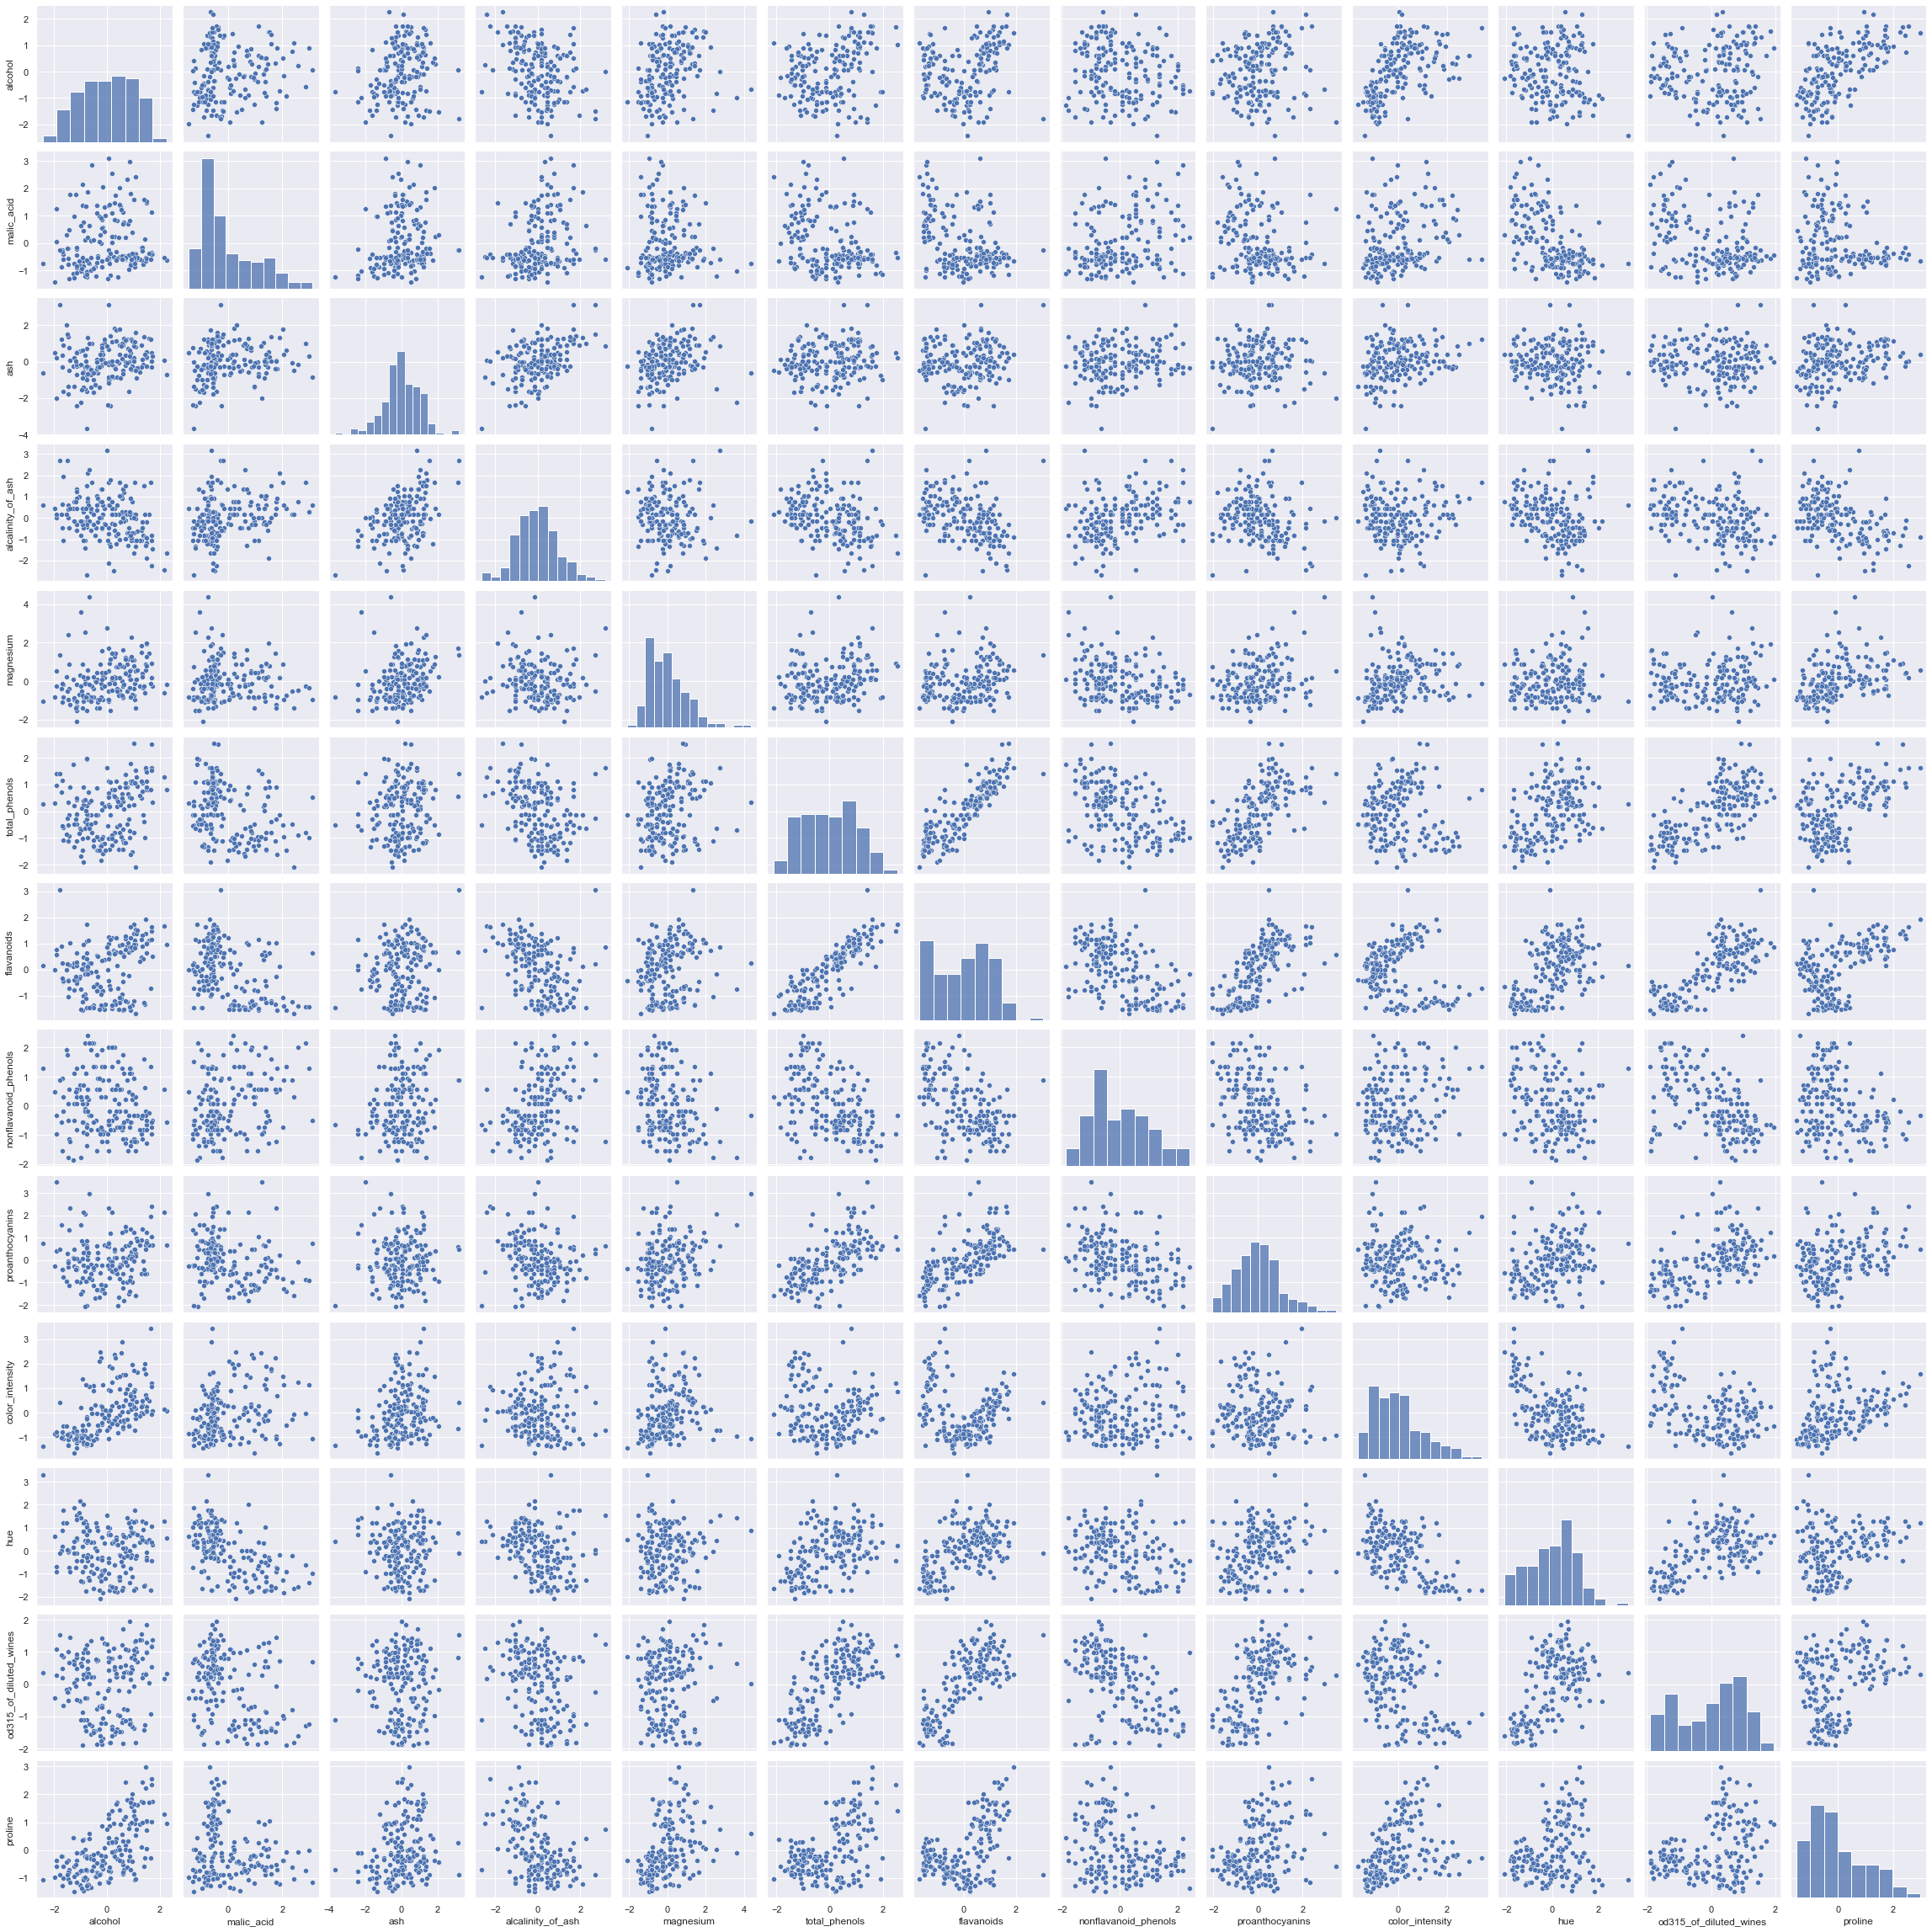

In [39]:
sns.pairplot(Data)

Особых выбросов не наблюдаем

### Рассмотрим Логистическую регрессию

In [40]:
model_1 = sm.MNLogit(y, sm.add_constant(Data)).fit(start_params=10 * np.random.randn(14, 2), method='cg')
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 13
         Function evaluations: 73
         Gradient evaluations: 73


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      150
Method:                           MLE   Df Model:                           26
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                   1.000
Time:                        21:50:25   Log-Likelihood:             -0.0013011
converged:                       True   LL-Null:                       -193.31
Covariance Type:            nonrobust   LLR p-value:                 6.722e-66
==========================================================================================
                   y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11.9620   4.69e+05  -2.55e-05      1.000   -9.19e+05    9.19e+05
alcohol                  -31.2532   1.08e+06   -2.9e-05      1.000   -2.11e+06    2.11e+06
malic_acid                -6.9524   5.39e+05  -1.29e-05      1.000   -1.06e+06    1.06e+06
ash                       -9.9380   4.06e+05  -2.45e-05      1.000   -7.96e+05    7.96e+05
alcalinity_of_ash         10.5219    2.7e+05   3.89e-05      1.000    -5.3e+05     5.3e+05
magnesium                 -2.0813   4.51e+05  -4.61e-06      1.000   -8.84e+05    8.84e+05
total_phenols             -1.8482   5.91e+05  -3.13e-06      1.000   -1.16e+06    1.16e+06
flavanoids                -2.5278   9.76e+05  -2.59e-06      1.000   -1.91e+06    1.91e+06
nonflavanoid_phenols       7.3463   4.47e+05   1.64e-05      1.000   -8.76e+05    8.76e+05
proanthocyanins           -1.2905   3.44e+05  -3.75e-06      1.000   -6.74e+05    6.74e+05
color_intensity          -30.4140   7.51e+05  -4.05e-05      1.000   -1.47e+06    1.47e+06
hue                       12.0520   9.96e+05   1.21e-05      1.000   -1.95e+06    1.95e+06
od315_of_diluted_wines    -1.6589   7.15e+05  -2.32e-06      1.000    -1.4e+06     1.4e+06
proline                  -36.4086    4.8e+05  -7.58e-05      1.000   -9.41e+05    9.41e+05
------------------------------------------------------------------------------------------
                   y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -17.3080   3.19e+05  -5.42e-05      1.000   -6.26e+05    6.26e+05
alcohol                   -2.6170   7.53e+05  -3.48e-06      1.000   -1.48e+06    1.48e+06
malic_acid                 7.6664   3.31e+05   2.32e-05      1.000   -6.48e+05    6.48e+05
ash                       10.6721   3.35e+05   3.18e-05      1.000   -6.57e+05    6.57e+05
alcalinity_of_ash         -1.7495   3.11e+05  -5.63e-06      1.000   -6.09e+05    6.09e+05
magnesium                 -9.3805   5.77e+05  -1.63e-05      1.000   -1.13e+06    1.13e+06
total_phenols             -2.1272   6.24e+05  -3.41e-06      1.000   -1.22e+06    1.22e+06
flavanoids                 3.2883   7.78e+05   4.23e-06      1.000   -1.52e+06    1.52e+06
nonflavanoid_phenols       2.3218   4.44e+05   5.23e-06      1.000    -8.7e+05     8.7e+05
proanthocyanins          -23.9310   7.47e+05   -3.2e-05      1.000   -1.46e+06    1.46e+06
color_intensity           20.2183   6.48e+05   3.12e-05      1.000   -1.27e+06    1.27e+06
hue                      -15.4133    1.7e+05  -9.05e-05      1.000   -3.34e+05    3.34e+05
od315_of_diluted_wines   -14.5528   3.81e+05  -3.82e-05      1.000   -7.46e+05    7.46e+05
proline                   -1.8924   4.18e+05  -4.53e-06      1.000   -8.19e+05    8.19e+05
==========================================================================================
"""

Получили что для каждого признака $p_{value}$ теста на равернство нулю коэффициента близко к единице (видим из z статистики).Т.е они все незначимы. 

Удалим их все и начнем добавлять веса по одному.

Значимые улучшения будем отбирать с помощью критерия отношения правlоподобий.

In [41]:
features = []
# только константа
model_2 = sm.MNLogit(y, sm.add_constant(np.ones((y.reshape(-1).shape[0])))).fit(start_params=np.random.randn(1, 2), method='cg')
model_2.summary()

Optimization terminated successfully.
         Current function value: 1.086038
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      176
Method:                           MLE   Df Model:                            0
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:               1.132e-10
Time:                        21:50:25   Log-Likelihood:                -193.31
converged:                       True   LL-Null:                       -193.31
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1851      0.176      1.051      0.293      -0.160       0.530
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2064      0.194     -1.062      0.288      -0.587       0.175
==============================================================================
"""

In [42]:
for f in Data.columns:
    model_f = sm.MNLogit(y, sm.add_constant(Data[f])).fit(start_params=10 * np.random.randn(2, 2), method='cg')
    # log-ratio + Bonferroni
    T = 2 * (model_1.llf - model_f.llf)
    dof = 14 - 2
    p_value = min((1 - st.chi2.cdf(T, dof)) * len(Data.columns), 1)
    print(f'p_value = {p_value}')
    # model_f.summary()

Optimization terminated successfully.
         Current function value: 0.652032
         Iterations: 16
         Function evaluations: 47
         Gradient evaluations: 47
p_value = 0.0
Optimization terminated successfully.
         Current function value: 0.937846
         Iterations: 14
         Function evaluations: 40
         Gradient evaluations: 40
p_value = 0.0
Optimization terminated successfully.
         Current function value: 1.014183
         Iterations: 15
         Function evaluations: 39
         Gradient evaluations: 39
p_value = 0.0
Optimization terminated successfully.
         Current function value: 0.905456
         Iterations: 25
         Function evaluations: 68
         Gradient evaluations: 68
p_value = 0.0
Optimization terminated successfully.
         Current function value: 1.019358
         Iterations: 14
         Function evaluations: 37
         Gradient evaluations: 37
p_value = 0.0
Optimization terminated successfully.
         Current function value:

Для всех признаков $p_{value} = 0$. Будем добавлять признаки по одному, пока это возможно.

In [43]:
model_2 = sm.MNLogit(y, sm.add_constant(Data[['alcohol', 'malic_acid']])).fit(start_params=np.random.randn(3, 2), method='cg')
print(model_2.llf)

Optimization terminated successfully.
         Current function value: 0.528643
         Iterations: 17
         Function evaluations: 50
         Gradient evaluations: 50
-94.09846466989148


In [44]:
features = []
old_model = model_2
has_profit = True
while has_profit:
    has_profit = False
    for f in Data.columns:
        if f in features:
            continue
        model_f = sm.MNLogit(y, sm.add_constant(Data[[f] + features])).fit(start_params=np.random.randn(len(features) + 2, 2),
                                                                         method='cg')
        # log-ratio + Bonferroni
        T = 2 * (-model_2.llf + model_f.llf)
        dof = 1
        p_value = min((1 - st.chi2.cdf(T, dof)) * (len(Data.columns) - len(features)), 1)
        # print(model_f.pvalues[0][1])
        # break
        if p_value < 0.05 and model_f.pvalues[0][1] < 0.25:
            has_profit = True
            old_model = sm.MNLogit(y, sm.add_constant(Data[[f] + features])).fit(start_params=np.random.randn(len(features) + 2, 2),
                                                                         method='cg')
            features += [f]
            print(f'p_value = {p_value}, {f}')
            break

Optimization terminated successfully.
         Current function value: 0.652032
         Iterations: 15
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.937846
         Iterations: 9
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.014183
         Iterations: 10
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.905456
         Iterations: 12
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.019358
         Iterations: 10
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.737772
         Iterations: 14
         Function evaluations: 36
   

c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

         Current function value: 0.149084
         Iterations: 35
         Function evaluations: 130
         Gradient evaluations: 130
         Current function value: 0.149100
         Iterations: 35
         Function evaluations: 127
         Gradient evaluations: 127
p_value = 0.0, ash
         Current function value: 0.134655
         Iterations: 35
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.056130
         Iterations: 35
         Function evaluations: 131
         Gradient evaluations: 131


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

         Current function value: 0.056192
         Iterations: 35
         Function evaluations: 136
         Gradient evaluations: 136
p_value = 0.0, alcalinity_of_ash
         Current function value: 0.034866
         Iterations: 35
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.033411
         Iterations: 35
         Function evaluations: 141
         Gradient evaluations: 141
p_value = 0.0, malic_acid
         Current function value: 0.022374
         Iterations: 35
         Function evaluations: 136
         Gradient evaluations: 136


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

         Current function value: 0.015627
         Iterations: 35
         Function evaluations: 130
         Gradient evaluations: 130
         Current function value: 0.005798
         Iterations: 35
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.032608
         Iterations: 35
         Function evaluations: 135
         Gradient evaluations: 135
         Current function value: 0.011273
         Iterations: 35
         Function evaluations: 151
         Gradient evaluations: 151


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.002072
         Iterations: 35
         Function evaluations: 165
         Gradient evaluations: 165
         Current function value: 0.000918
         Iterations: 35
         Function evaluations: 167
         Gradient evaluations: 167
         Current function value: 0.024593
         Iterations: 35
         Function evaluations: 137
         Gradient evaluations: 137


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
print(f'Получаем следующие признаки : {features}')

Получаем следующие признаки : ['flavanoids', 'alcohol', 'ash', 'alcalinity_of_ash', 'malic_acid']


###  линейность признаков по логиту и межфакторное взаимодействие

Финальная модель:

In [46]:
model_final = sm.MNLogit(y, sm.add_constant(Data[features])).fit(start_params=np.random.randn(len(features) + 1, 2), method='cg')
model_final.summary()

         Current function value: 0.029854
         Iterations: 35
         Function evaluations: 139
         Gradient evaluations: 139


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      166
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                  0.9725
Time:                        21:50:27   Log-Likelihood:                -5.3141
converged:                      False   LL-Null:                       -193.31
Covariance Type:            nonrobust   LLR p-value:                 1.197e-74
=====================================================================================
              y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2864      5.311      1.372      0.170      -3.122      17.695
flavanoids           -9.8522      6.596     -1.494      0.135     -22.780       3.076
alcohol             -17.0696     12.384     -1.378      0.168     -41.342       7.203
ash                 -11.1842      6.592     -1.697      0.090     -24.104       1.735
alcalinity_of_ash    18.2601     11.070      1.650      0.099      -3.436      39.956
malic_acid           -5.6463      3.971     -1.422      0.155     -13.429       2.136
-------------------------------------------------------------------------------------
              y=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.5834      9.992     -0.659      0.510     -26.167      13.000
flavanoids          -30.0300     13.565     -2.214      0.027     -56.618      -3.442
alcohol              -9.3502     13.188     -0.709      0.478     -35.197      16.497
ash                  -9.5830      6.824     -1.404      0.160     -22.958       3.792
alcalinity_of_ash    20.3445     11.451      1.777      0.076      -2.099      42.788
malic_acid           -4.1451      4.209     -0.985      0.325     -12.394       4.104
=====================================================================================
"""

Оценка качества модели:

In [47]:
y_pred = model_final.predict(sm.add_constant(Data[features])).to_numpy().argmax(-1)
print(f'Accuracy {(y == y_pred).sum() / y.shape[0]:.2f}')

Accuracy 0.99
